In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler
# Normalize the data using StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [9]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)
# Copy the crypto names from the original data

crypto_names = market_data_df.index.tolist()

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


### Find the Best Value for k Using the Original Scaled DataFrame.

In [13]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:

# 1. Create a KMeans model using the loop counter for the n_clusters
  kmeans = KMeans(n_clusters=k, random_state=0)

# 2. Fit the model to the data using the scaled DataFrame
  kmeans.fit(scaled_market_data_df)

# 3. Append the model.inertia_ to the inertia list

  inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve

elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


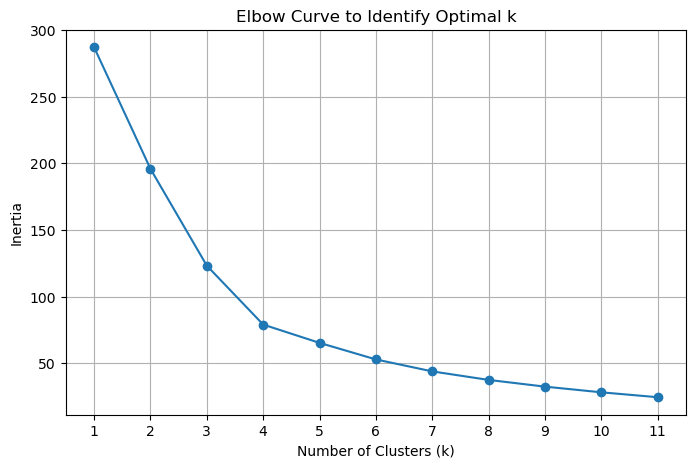

In [15]:
# Plot a line chart with all the inertia values computed with 
import matplotlib.pyplot as plt

# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve to Identify Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [16]:
# Initialize the K-Means model using the best value for k
k_best = 4
kmeans_model = KMeans(n_clusters=k_best, random_state=0)


In [17]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_market_data_df)


KMeans(n_clusters=4, random_state=0)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(scaled_market_data_df)


# View the resulting array of cluster values.
cluster_predictions


array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [19]:
# Create a copy of the DataFrame
market_data_with_clusters_df = market_data_df.copy()


In [20]:
# Add a new column to the DataFrame with the predicted clusters

market_data_with_clusters_df['Cluster'] = cluster_predictions

# Display sample data
market_data_with_clusters_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


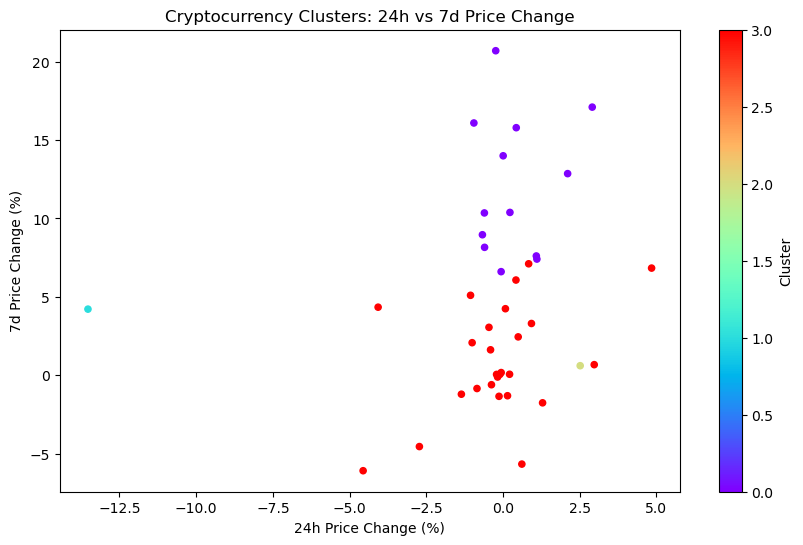

In [21]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scatter_plot = market_data_with_clusters_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    colormap="rainbow",
    figsize=(10, 6),
    title="Cryptocurrency Clusters: 24h vs 7d Price Change"
)

scatter_plot.set_xlabel("24h Price Change (%)")
scatter_plot.set_ylabel("7d Price Change (%)")

plt.show()

### Optimize Clusters with Principal Component Analysis.

In [27]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [28]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

pca_data = pca_model.fit_transform(scaled_market_data_df)

# View the first five rows of the DataFrame. 
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [29]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
The total explained variance of the three principal components is approximately 89.5%. This is calculated by summing the explained variance ratios of the three components:

0.3719856+0.34700813+0.17603793=0.89503166≈89.5%
 

In [30]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

# Creating a DataFrame with the PCA data

crypto_names = market_data_df.index.tolist()

# Copy the crypto names from the original data

pca_df['coin_id'] = crypto_names
pca_df.set_index('coin_id', inplace=True)


# Display sample data
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [31]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using the PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


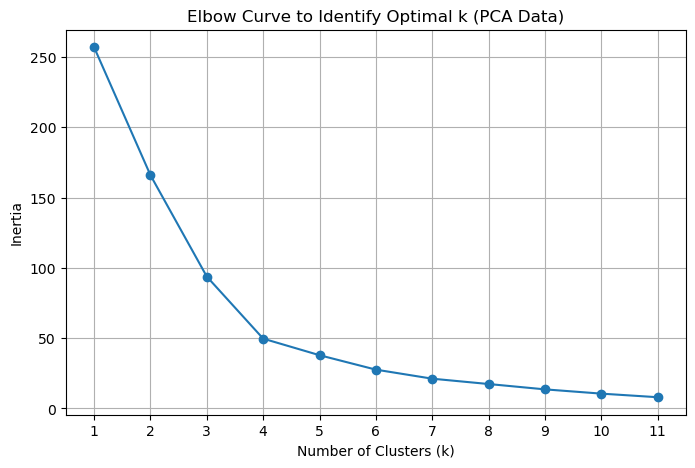

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve to Identify Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no
  This consistency suggests that the PCA transformation has preserved the key structure of the data, and the same number of clusters is optimal in both cases.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [33]:
# Initialize the K-Means model using the best value for k
k_best_pca = 4
kmeans_pca_model = KMeans(n_clusters=k_best_pca, random_state=0)

In [34]:
# Fit the K-Means model using the PCA data
kmeans_pca_model.fit(pca_df)

KMeans(n_clusters=4, random_state=0)

In [35]:
# Predict the clusters to group the cryptocurrencies using the PCA data
 
pca_cluster_predictions = kmeans_pca_model.predict(pca_df)

# Print the resulting array of cluster values.
pca_cluster_predictions


array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [36]:
# Create a copy of the DataFrame with the PCA data

pca_clustered_df = pca_df.copy()
# Add a new column to the DataFrame with the predicted clusters

pca_clustered_df['Cluster'] = pca_cluster_predictions

# Display sample data
pca_clustered_df.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [40]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
# You can use a different colormap if you prefer

scatter_plot = pca_clustered_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    title='PCA1 vs PCA2 Scatter Plot with Clusters',
    xlabel='PCA1',
    ylabel='PCA2',
    colormap='Category10',  
    size=100
)
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [42]:
# Use the columns from the original scaled DataFrame as the index.
pca_clustered_df.index = scaled_market_data_df.index
pca_clustered_df.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PC1 (First Principal Component):

Strongest Positive Influence: price_change_percentage_1y (0.568) has the strongest positive influence on PC1.
Strongest Negative Influence: price_change_percentage_24h (-0.417) has the strongest negative influence on PC1.

PC2 (Second Principal Component):

Strongest Positive Influence: price_change_percentage_14d (0.540) and price_change_percentage_30d (0.562) have strong positive influences on PC2.
Strongest Negative Influence: price_change_percentage_1y (-0.151) has a negative influence on PC2.

PC3 (Third Principal Component):

Strongest Positive Influence: price_change_percentage_7d (0.788) has the strongest positive influence on PC3.
Strongest Negative Influence: price_change_percentage_60d (-0.361) has the strongest negative influence on PC3.